# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin price analysis: BTC back above $37.5K, $40K next?.  Bitcoin price analysis for Jan 29, 2022, shows that the world&#8217;s biggest cryptocurrency has reclaimed the previous support of $37.5K. On the other hand, as per our BTC price analysis of Jan 28, BTC had already reclaimed $36K. This means that the possible way to go now is either $40K or back to $35K. The data from CoinMarketCap [&#8230;]The post Bitcoin price analysis: BTC back above $37.5K, $40K next? appeared first on Blockchain, Crypto and Stock News. ... [| Skaityti daugiau](https://thecoinrise.com/bitcoin-price-analysis-btc-back-above-37-5k-40k-next/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Police on guard against 'lone wolves' as protest convoy arrives in Ottawa | CBC News.  Ottawa's police chief says officials are watching for "social media actors" and "lone wolves" who might try to infiltrate this weekend's convoy protesting COVID-19 vaccine mandates. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/ottawa/police-weekend-demonstrations-ottawa-1.6331215) 

### Kainų kaita pandemijos metu

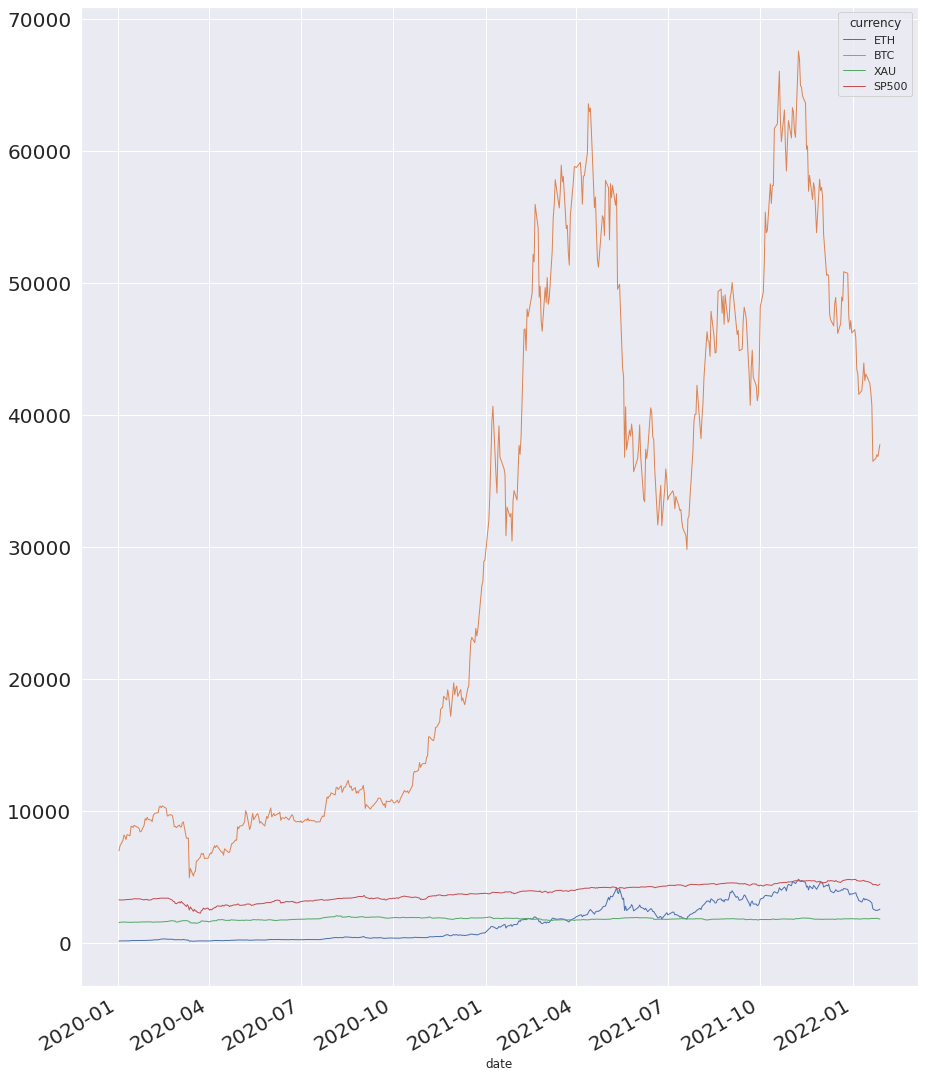

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903224,0.156169,0.917690
BTC,0.903224,1.000000,0.137771,0.873238
XAU,0.156169,0.137771,1.000000,0.302460
SP500,0.917690,0.873238,0.302460,1.000000


In [8]:
#hide ### Koreliacijos matrica.

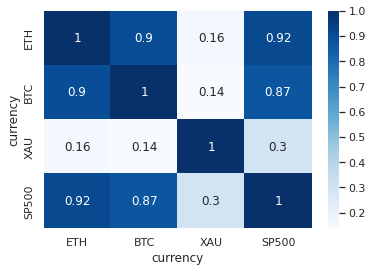

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')